Thực hành về hồi qui tuyến tính Linear Regerstion


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#1. Hàm dự đoán tr
def predict(X, m, b):
    return m*X +b

In [4]:
#2. Hàm mất mát
def cost_function(X, y, m, b):
    n = len(X)
    total = 0.0
    for i in range(n):
        total+=(y[i]-(m*X[i]+b))**2
    return total/n

In [6]:
#3. Viết hàm cập nhật
def update_weights(X, y, m, b, learning_rate):
    m1=0
    b1=0
    n=len(X)
    for i in range(n):
        m1+= -2*X[i]*(y[i]-(m*X[i]+b))
        b1+= -2*(y[i]-(m*X[i]+b))
    m -= (m1 / n) * learning_rate
    b -= (b1 / n) * learning_rate
    return m,b


In [7]:
#4. Viết hàm Train
def train(X, y, m, b, learning_rate, iters):
    cost_history = []
    for i in range(iters):
        m,b = update_weights(X, y, m, b, learning_rate)
        cost = cost_function(X, y, m, b)
        cost_history.append(cost)
        if i%10==0:
          print("iter={:d} weight={:.2f} bias={:.4f} cost={:.2}".format(i, m, b, cost))    
    return m,b,cost_history


In [8]:
#5. Tạo dữ liệu và train
X = np.array([147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183])
y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])
X=X/max(X)
y=y/max(y)
m,b,h=train(X,y,0.0,0.0,0.5,1500)

iter=0 weight=0.80 bias=0.8722 cost=0.53
iter=10 weight=0.51 bias=0.5166 cost=0.016
iter=20 weight=0.49 bias=0.4461 cost=0.0043
iter=30 weight=0.50 bias=0.4193 cost=0.0038
iter=40 weight=0.52 bias=0.3995 cost=0.0037
iter=50 weight=0.54 bias=0.3810 cost=0.0035
iter=60 weight=0.56 bias=0.3631 cost=0.0034
iter=70 weight=0.58 bias=0.3456 cost=0.0033
iter=80 weight=0.60 bias=0.3285 cost=0.0031
iter=90 weight=0.62 bias=0.3117 cost=0.003
iter=100 weight=0.64 bias=0.2952 cost=0.0029
iter=110 weight=0.65 bias=0.2791 cost=0.0028
iter=120 weight=0.67 bias=0.2633 cost=0.0027
iter=130 weight=0.69 bias=0.2478 cost=0.0026
iter=140 weight=0.71 bias=0.2327 cost=0.0025
iter=150 weight=0.72 bias=0.2178 cost=0.0024
iter=160 weight=0.74 bias=0.2033 cost=0.0023
iter=170 weight=0.75 bias=0.1890 cost=0.0022
iter=180 weight=0.77 bias=0.1751 cost=0.0021
iter=190 weight=0.78 bias=0.1614 cost=0.002
iter=200 weight=0.80 bias=0.1480 cost=0.0019
iter=210 weight=0.81 bias=0.1349 cost=0.0019
iter=220 weight=0.83 bias=

6. Thay đổi hệ số học và số lần lặp quan sát kết quả

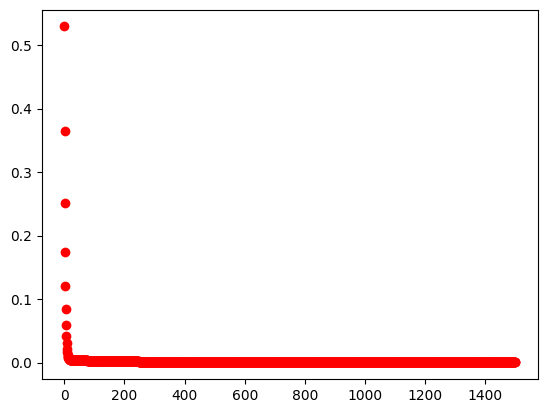

In [9]:
#7. Vẽ biểu đồ biểu thị sự thay đổi hàm mất mát
plt.scatter(x=list(range(0, 1500)), y=h,color='red')
plt.show()

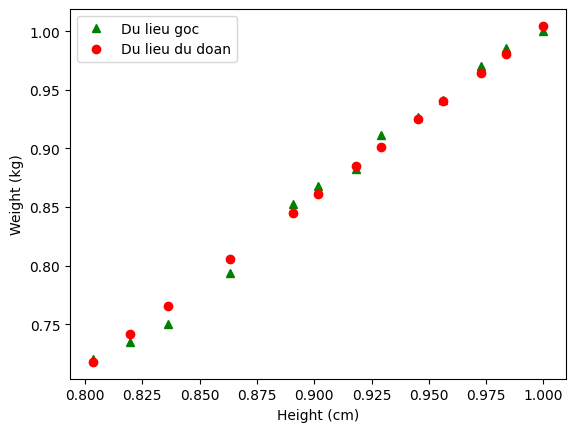

In [10]:
#8. In kết quả dự đoán và kết quả thật để so sánh
y1=predict(X,m,b)
plt.plot(X, y, 'g^',label='Du lieu goc')
plt.plot(X, y1, 'ro',label='Du lieu du doan')
plt.legend()
#plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
#9. Thay đổi hệ số học và lần lặp kiểm tra kết quả


10. Đọc dữ liệu từ file Cannang. Thực hiện train và test.

    140.0  35.0
0   142.0  40.0
1   150.0  45.0
2   152.0  48.0
3   158.0  55.0
4   160.0  56.0
5   163.0  58.0
6   165.0  62.0
7   173.0  65.0
8   175.0  68.0
9   178.0  82.0
10  180.0  85.0
11  183.0  87.0
12  188.0  90.0
13  190.0  92.0


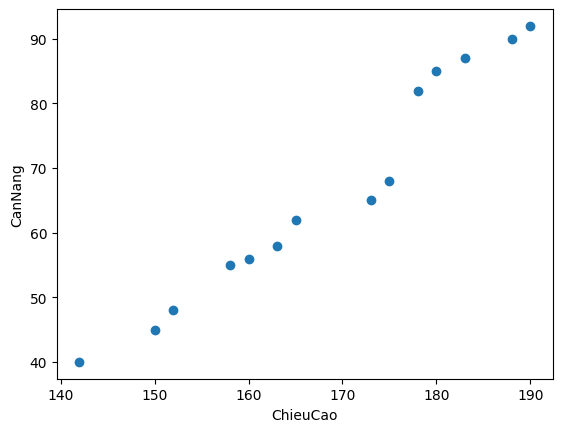

In [11]:
df = pd.read_csv(r'F:\study\HK1_3_2425\DS321_MachineLearning1\resources\CanNang.csv')
axis = lambda x: df.iloc[:, x]
print(df)
plt.scatter(axis(0), axis(1))
plt.xlabel('ChieuCao')
plt.ylabel('CanNang')
plt.show()

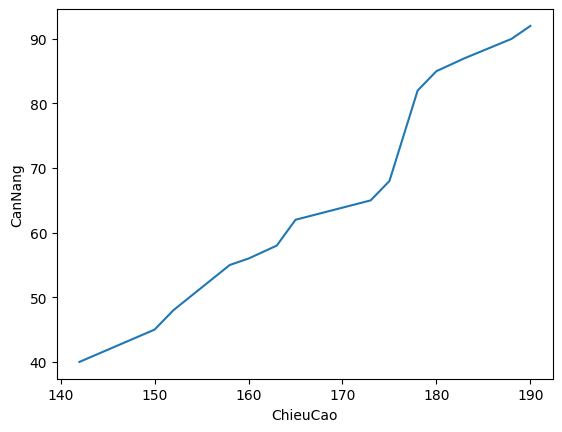

In [12]:
plt.plot(axis(0), axis(1))
plt.xlabel('ChieuCao')
plt.ylabel('CanNang')
plt.show()

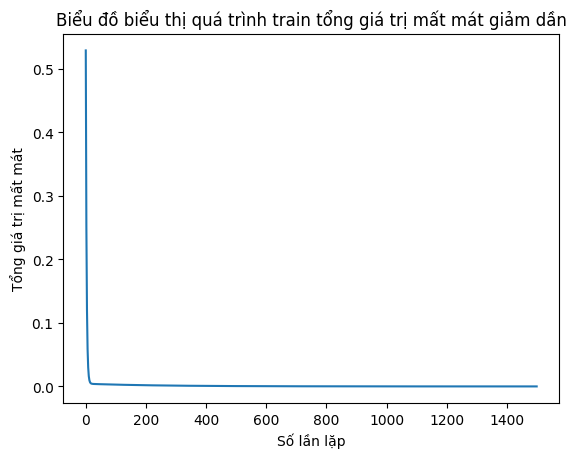

In [13]:
plt.plot(range(len(h)), h)
plt.xlabel('Số lần lặp')
plt.ylabel('Tổng giá trị mất mát')
plt.title('Biểu đồ biểu thị quá trình train tổng giá trị mất mát giảm dần')
plt.show()

In [14]:
#In tham số mô hình sau khi kết thúc quá trình trai
print("Tham số mô hình:")
print(" - Hệ số góc (m):", m)
print(" - Độ lệch (b):", b)


Tham số mô hình:
 - Hệ số góc (m): 1.4561740044791667
 - Độ lệch (b): -0.45169820102303787


In [15]:
# Dự đoán chiều cao cho một cân nặng mới
x_new = 55  # Cân nặng mới (kg)
y_new_predicted = m * x_new + b
print(f"Dự đoán chiều cao cho cân nặng {x_new} kg là {y_new_predicted:.2f} cm")

Dự đoán chiều cao cho cân nặng 55 kg là 79.64 cm
